In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
titanicdata=pd.read_csv('Titanicdata.csv')

In [6]:
titanicdata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df=pd.DataFrame(titanicdata)

In [8]:
df.shape

(891, 12)

In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
df['PassengerId'].value_counts()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

* PassengerId 891 records which are all unique data which doesn't make any impact on output

In [19]:
categorial_columns=df.select_dtypes(include=[object])
categorial_columns

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


* in the dataset there are 5 columns which are categorical, this includes Name and Ticket which doesnt make any impact on output data hence these columns can be dropped

In [20]:
df.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [21]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [22]:
df.shape

(891, 9)

In [23]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

*There are missing values in Age, Cabin and Embarked columns which can be further imputed

In [24]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [27]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

male      577
female    314
Name: Sex, dtype: int64


(array([577.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 314.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

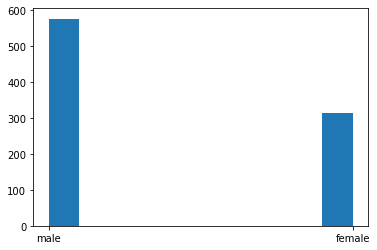

In [32]:
# No of male and females in the ship
print(df['Sex'].value_counts())
plt.hist(df['Sex'])

In [43]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [46]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

* We can see that only 342 survived out of total No of passengers

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

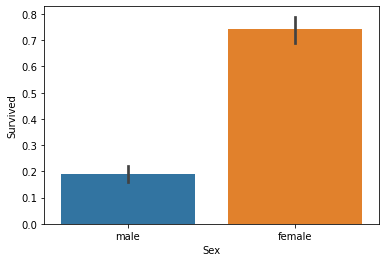

In [48]:
sns.barplot(x='Sex', y='Survived', data=df)

* By the above graph we can tell that Female survived highest than Male

In [50]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

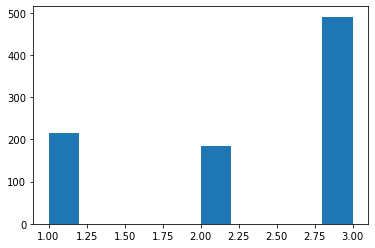

In [51]:
plt.hist(df['Pclass'])

* More number of passengers travelled in Pclass 3 than in 1 and 2

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

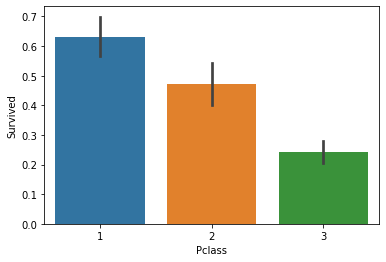

In [49]:
sns.barplot(x='Pclass', y='Survived', data=df)

* Highest No of survivals were in Pclass 1 than others

<AxesSubplot:xlabel='Age', ylabel='Count'>

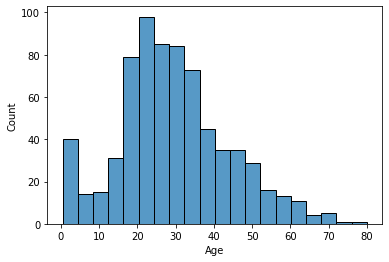

In [53]:
sns.histplot(df['Age'])

* Graph shows that majority of passengers age lie between 15 to 35

<AxesSubplot:xlabel='Embarked', ylabel='count'>

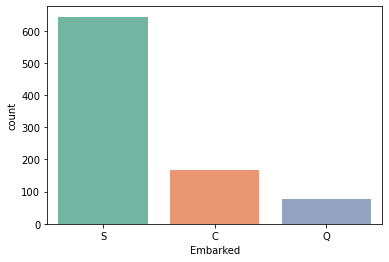

In [54]:
sns.countplot(x='Embarked', data=df, palette='Set2')

* Highest No of counts lie in Enbarjed category S and least in Q

In [56]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [57]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

* 147 Unique cabins in the ship

* The columns SibSp and Parch tells us about No of siblings and Parents travelled along, As it tells about the family data we can merge both the columns to make the dataset simplified.
* We can merge and create a new column which tells us that whether passenger travelled alone or with family

In [61]:
df['Family']=df['SibSp'] + df['Parch']

In [62]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,0,3,male,22.0,1,0,7.2500,NaN,S,1
1,1,1,female,38.0,1,0,71.2833,C85,C,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,1,1,female,35.0,1,0,53.1000,C123,S,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,0


We can drop off SibSp and Parch columns now

In [65]:
df.drop(['SibSp','Parch'],axis=1,inplace=True)

In [66]:
df.shape

(891, 8)

In [67]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Cabin       687
Embarked      2
Family        0
dtype: int64

In [69]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
df['Age']=imputer.fit_transform(df['Age'].values.reshape(-1,1))

In [70]:
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Cabin']=imputer.fit_transform(df['Cabin'].values.reshape(-1,1))

In [71]:
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Embarked']=imputer.fit_transform(df['Embarked'].values.reshape(-1,1))

In [72]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Cabin       0
Embarked    0
Family      0
dtype: int64

* No missing values in data

In [74]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
Cabin        object
Embarked     object
Family        int64
dtype: object

In [75]:
le=LabelEncoder()
cat_df=['Sex','Cabin','Embarked']
for columns in cat_df:
    df[columns] = le.fit_transform(df[columns])

In [76]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
Fare        float64
Cabin         int32
Embarked      int32
Family        int64
dtype: object

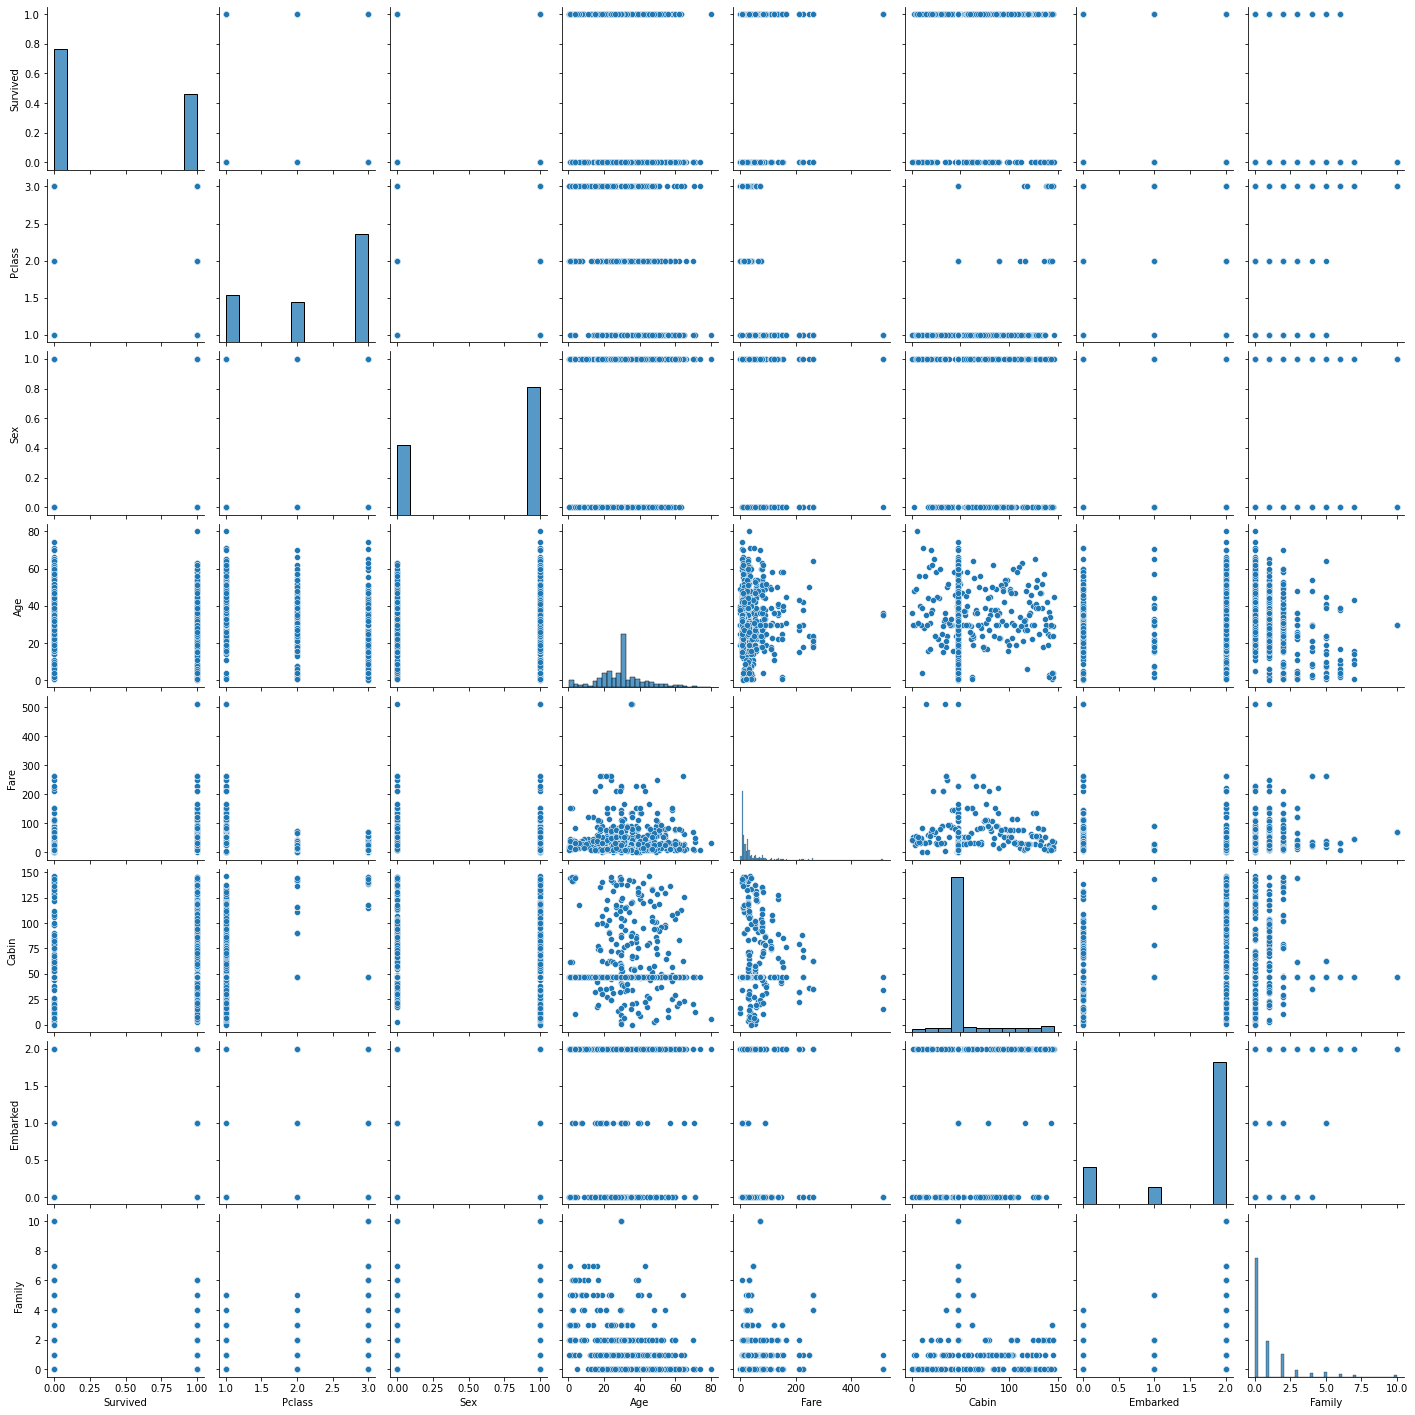

In [77]:
sns.pairplot(df)

In [78]:
df.describe()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,32.204208,53.639731,1.536476,0.904602
std,0.486592,0.836071,0.477990,13.002015,49.693429,23.568293,0.791503,1.613459
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.910400,47.000000,1.000000,0.000000
50%,0.000000,3.000000,1.000000,29.699118,14.454200,47.000000,2.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,31.000000,47.000000,2.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,146.000000,2.000000,10.000000


Key Observations:
* We can see that mean > than median only in the columns Fare and Cabin, hence there is left skewness present
* There is a gap between 75th percentile and max in Age, Fare, Cabin, Family hence the data is highly spreaded
* In Age, Fare, Cabin there is a high difference between mean and std and we can find outliers present in thses data

In [79]:
df.corr()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
Survived,1.000000,-0.338481,-0.543351,-0.069809,0.257307,0.175690,-0.167675,0.016639
Pclass,-0.338481,1.000000,0.131900,-0.331339,-0.549500,-0.248495,0.162098,0.065997
Sex,-0.543351,0.131900,1.000000,0.084153,-0.182333,-0.102643,0.108262,-0.200988
Age,-0.069809,-0.331339,0.084153,1.000000,0.091566,0.056011,-0.026749,-0.248512
Fare,0.257307,-0.549500,-0.182333,0.091566,1.000000,0.090516,-0.224719,0.217138
Cabin,0.175690,-0.248495,-0.102643,0.056011,0.090516,1.000000,0.023804,0.007546
Embarked,-0.167675,0.162098,0.108262,-0.026749,-0.224719,0.023804,1.000000,0.066516
Family,0.016639,0.065997,-0.200988,-0.248512,0.217138,0.007546,0.066516,1.000000


<AxesSubplot:>

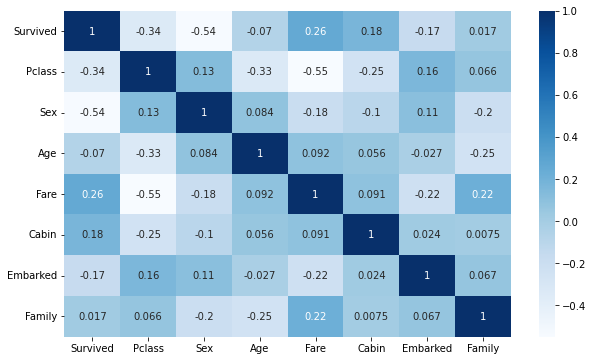

In [80]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

* The Survived data has higher correlation with Cabin and Fare compared to other inputs
* It is negatively correlated with Embarked, sex and Pclass
* Pclass and sex has highest correlation

In [81]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
Fare        4.787317
Cabin       2.268926
Embarked   -1.264823
Family      2.727441
dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Count'>

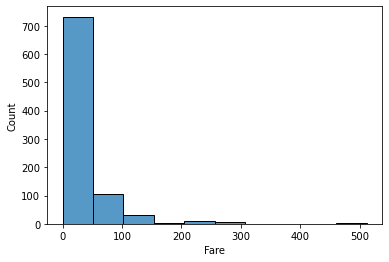

In [82]:
sns.histplot(df['Fare'],bins=10)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

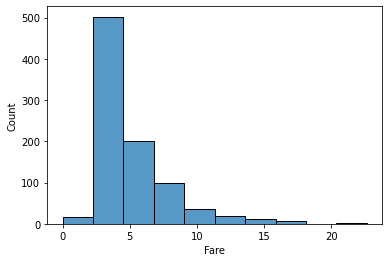

In [83]:
df['Fare']=np.sqrt(df['Fare'])
sns.histplot(df['Fare'],bins=10)

<AxesSubplot:xlabel='Cabin', ylabel='Count'>

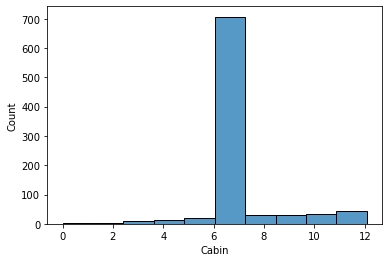

In [84]:
df['Cabin']=np.sqrt(df['Cabin'])
sns.histplot(df['Cabin'],bins=10)

<AxesSubplot:xlabel='Family', ylabel='Count'>

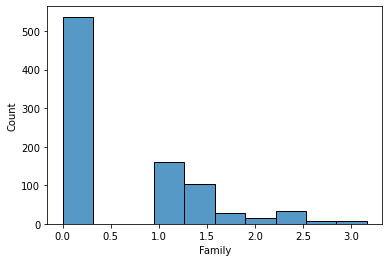

In [85]:
df['Family']=np.sqrt(df['Family'])
sns.histplot(df['Family'],bins=10)

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

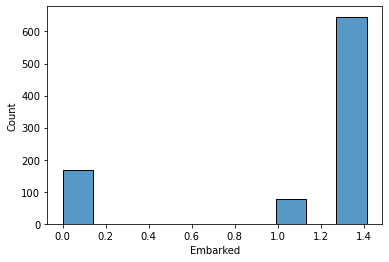

In [86]:
df['Embarked']=np.sqrt(df['Embarked'])
sns.histplot(df['Embarked'],bins=10)

In [87]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
Fare        2.085004
Cabin       1.004866
Embarked   -1.454636
Family      1.077973
dtype: float64

<Figure size 1008x576 with 0 Axes>

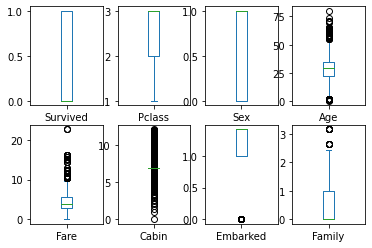

<Figure size 1008x576 with 0 Axes>

In [93]:
#Finding outliers

df.plot(kind='box',subplots=True,layout=(2,4))
plt.figure(figsize=(14,8))

In [94]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,0.789272,0.827377,0.737695,0.592481,0.733117,0.221922,0.551775,0.569692
1,1.266990,1.566107,1.355574,0.638789,1.219822,1.253334,2.028253,0.569692
2,1.266990,0.827377,1.355574,0.284663,0.691495,0.221922,0.551775,0.735440
3,1.266990,1.566107,1.355574,0.407926,0.827232,0.163718,0.551775,0.569692
4,0.789272,0.827377,0.737695,0.407926,0.683984,0.221922,0.551775,0.735440
...,...,...,...,...,...,...,...,...
886,0.789272,0.369365,0.737695,0.207709,0.423054,0.221922,0.551775,0.735440
887,1.266990,1.566107,1.355574,0.823344,0.212604,1.170246,0.551775,0.735440
888,0.789272,0.827377,1.355574,0.000000,0.002955,0.221922,0.551775,1.525116
889,1.266990,1.566107,0.737695,0.284663,0.212604,0.390590,2.028253,0.735440


In [95]:
threshold=3
print(np.where(z>3))

(array([ 10,  27,  66,  75,  88,  96, 116, 118, 128, 148, 159, 180, 183,
       193, 201, 205, 251, 258, 262, 284, 299, 311, 324, 339, 340, 341,
       345, 377, 380, 394, 438, 475, 493, 516, 527, 556, 557, 558, 583,
       585, 599, 618, 630, 630, 647, 672, 679, 689, 699, 700, 715, 716,
       724, 730, 737, 742, 745, 772, 776, 779, 792, 809, 846, 851, 863,
       867], dtype=int64), array([5, 4, 5, 5, 4, 3, 3, 4, 5, 5, 7, 7, 5, 5, 7, 5, 5, 4, 5, 5, 4, 4,
       7, 5, 5, 4, 5, 4, 4, 5, 4, 5, 3, 5, 4, 5, 4, 5, 5, 5, 5, 5, 3, 5,
       5, 3, 4, 4, 5, 4, 5, 4, 5, 4, 4, 4, 3, 5, 5, 4, 7, 5, 7, 3, 7, 5],
      dtype=int64))


In [97]:
df_new=df[(z<3).all(axis=1)]
df_new

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,0,3,1,22.000000,2.692582,6.855655,1.414214,1.000000
1,1,1,0,38.000000,8.442944,9.000000,0.000000,1.000000
2,1,3,0,26.000000,2.815138,6.855655,1.414214,0.000000
3,1,1,0,35.000000,7.286975,7.416198,1.414214,1.000000
4,0,3,1,35.000000,2.837252,6.855655,1.414214,0.000000
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,3.605551,6.855655,1.414214,0.000000
887,1,1,0,19.000000,5.477226,5.477226,1.414214,0.000000
888,0,3,0,29.699118,4.842520,6.855655,1.414214,1.732051
889,1,1,1,26.000000,5.477226,7.745967,0.000000,0.000000


In [98]:
print("Shape of old data :",df.shape)
print("Shape of cleansed data :",df_new.shape)

Shape of old data : (891, 8)
Shape of cleansed data : (826, 8)


In [100]:
x=df_new.iloc[:,1:]
x.head(1)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,3,1,22.0,2.692582,6.855655,1.414214,1.0


In [102]:
y=df_new.iloc[:,0]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 826, dtype: int64

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [104]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif["Features"]=x.columns
    print(vif)

In [105]:
vif_calc()

   VIF Factor  Features
0   10.543121    Pclass
1    3.176621       Sex
2    7.442832       Age
3    9.701171      Fare
4   28.203373     Cabin
5    5.425321  Embarked
6    2.341256    Family


* From the above table we can see that Pclass and Cabin have the highest VIF Factors which are creating multicolinearity
* From df.corr() we can see that Pclass has negative correlation (-0.34) with Output and Cabin has 0.18 correlation with Output
* Comparing both Cabin gives more contribution to Output than Pclass hence Pclass can be dropped

In [106]:
df_new.drop(['Pclass'],axis=1,inplace=True)

In [107]:
df_new.shape

(826, 7)

In [108]:
x=df_new.iloc[:,1:]

In [109]:
x

,Sex,Age,Fare,Cabin,Embarked,Family
0,1,22.000000,2.692582,6.855655,1.414214,1.000000
1,0,38.000000,8.442944,9.000000,0.000000,1.000000
2,0,26.000000,2.815138,6.855655,1.414214,0.000000
3,0,35.000000,7.286975,7.416198,1.414214,1.000000
4,1,35.000000,2.837252,6.855655,1.414214,0.000000
...,...,...,...,...,...,...
886,1,27.000000,3.605551,6.855655,1.414214,0.000000
887,0,19.000000,5.477226,5.477226,1.414214,0.000000
888,0,29.699118,4.842520,6.855655,1.414214,1.732051
889,1,26.000000,5.477226,7.745967,0.000000,0.000000


In [110]:
vif_calc()

   VIF Factor  Features
0    3.049587       Sex
1    7.436227       Age
2    7.090794      Fare
3   16.351650     Cabin
4    5.105575  Embarked
5    2.115673    Family


In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [112]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((619, 6), (207, 6), (619,), (207,))

In [114]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()

In [116]:
model=[lg,gnb,svc,dtc,knn,rf]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of ",m,"is : ")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))

Accuracy score of  LogisticRegression() is : 
0.8067632850241546
[[119  16]
 [ 24  48]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       135
           1       0.75      0.67      0.71        72

    accuracy                           0.81       207
   macro avg       0.79      0.77      0.78       207
weighted avg       0.80      0.81      0.80       207

Accuracy score of  GaussianNB() is : 
0.7777777777777778
[[117  18]
 [ 28  44]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       135
           1       0.71      0.61      0.66        72

    accuracy                           0.78       207
   macro avg       0.76      0.74      0.75       207
weighted avg       0.77      0.78      0.77       207

Accuracy score of  SVC() is : 
0.6956521739130435
[[121  14]
 [ 49  23]]
              precision    recall  f1-score   support

           0       0.71      0.90      0.79       

* From the above models we can see that the best score is given by RandonForestClassifier (0.84)

In [117]:
from sklearn.model_selection import cross_val_score

In [119]:
for m in model:
    score=cross_val_score(m,x_train,y_train,cv=5)
    print("Score of : ",m )
    print(score)
    print(score.mean())
    print(score.std())

Score of :  LogisticRegression()
[0.81451613 0.79032258 0.77419355 0.82258065 0.69918699]
0.780159979019145
0.04398945185798934
Score of :  GaussianNB()
[0.79032258 0.75       0.79032258 0.70967742 0.67479675]
0.7430238657225281
0.0453650270552918
Score of :  SVC()
[0.70967742 0.70967742 0.66129032 0.66129032 0.69105691]
0.6865984788880146
0.021753887701070233
Score of :  DecisionTreeClassifier()
[0.83870968 0.73387097 0.74193548 0.77419355 0.65853659]
0.7494492525570418
0.058555881610970625
Score of :  KNeighborsClassifier()
[0.7016129  0.71774194 0.75       0.67741935 0.70731707]
0.7108182533438236
0.023645844455886262
Score of :  RandomForestClassifier()
[0.83064516 0.79032258 0.82258065 0.75806452 0.76422764]
0.7931681091004459
0.029487409550715427


* CV score is best with RandomForestClassifier model whic is given score mean as 0.7931

In [120]:
# Parameter tuning

from sklearn.model_selection import GridSearchCV

In [130]:
rf=RandomForestClassifier()
params={'criterion':['gini','entropy','log_loss']}

In [131]:
grd=GridSearchCV(estimator=rf,param_grid=params,cv=5)

In [132]:
grd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss']})

In [133]:
grd.best_score_

0.8060844479412536

In [134]:
grd.best_params_

{'criterion': 'entropy'}

In [135]:
# Saving the best model

rf=RandomForestClassifier(criterion='entropy')
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8405797101449275
[[124  11]
 [ 22  50]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       135
           1       0.82      0.69      0.75        72

    accuracy                           0.84       207
   macro avg       0.83      0.81      0.82       207
weighted avg       0.84      0.84      0.84       207



* Predicting survival by giving external inputs

In [136]:
a=np.array([1,46,3.6,6.8,1.4,1])
a.shape

(6,)

In [137]:
a=a.reshape(1,-1)
a.shape

(1, 6)

In [138]:
rf.predict(a)

array([0], dtype=int64)

In [139]:
df1=pd.DataFrame(pred)
df1.to_csv('Titanic_Survival_data.csv')